In [1]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Dataset

In [2]:
data = pd.read_csv(r'C:\Users\hp\Downloads\titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data['Name'].nunique()


891

In [6]:
data1=data.drop('Name',axis=1)

In [7]:
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data1.Sex.nunique()

2

In [9]:
data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data1 = data1.drop('Ticket', axis=1,)
data1= data1.drop('Fare', axis=1,)
data1= data1.drop('Cabin', axis=1,)

In [11]:
data1['Family'] = data1['SibSp'] + data1['Parch'] + 1
data1 = data1.drop('SibSp', axis=1,)
data1 = data1.drop('Parch', axis=1,)

In [12]:
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,male,22.0,S,2
1,2,1,1,female,38.0,C,2
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,2
4,5,0,3,male,35.0,S,1


In [13]:
data1.describe()

,PassengerId,Survived,Pclass,Age,Family
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.613459
min,1.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,11.000000


In [14]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Replacing NaN Values

In [15]:
data['Embarked'].isna().sum()

2

In [16]:
print(data1["Embarked"].mode())
data1["Embarked"] = data1["Embarked"].fillna("S")

0    S
Name: Embarked, dtype: object


In [17]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
data1["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

# Replacing String Values to machine Readable format

In [19]:
data1.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
data1.Sex.replace(['male', 'female'], [1,0], inplace=True)
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,1,22.0,1,2
1,2,1,1,0,38.0,2,2
2,3,1,3,0,26.0,1,1
3,4,1,1,0,35.0,1,2
4,5,0,3,1,35.0,1,1


# Knn Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
df_new = data1[np.isfinite(data1).all(1)]

In [23]:
y=df_new['Survived']
X=df_new.drop('Survived',axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2,random_state=42)

In [26]:
metric_k=[]
neighbors=range(3,18)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc= accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [27]:
metric_k

[0.5454545454545454,
 0.5524475524475524,
 0.5524475524475524,
 0.5454545454545454,
 0.5524475524475524,
 0.5874125874125874,
 0.5734265734265734,
 0.6013986013986014,
 0.5944055944055944,
 0.6083916083916084,
 0.5944055944055944,
 0.5874125874125874,
 0.5944055944055944,
 0.5664335664335665,
 0.5874125874125874]

# Finding K Value with maximum Accuracy

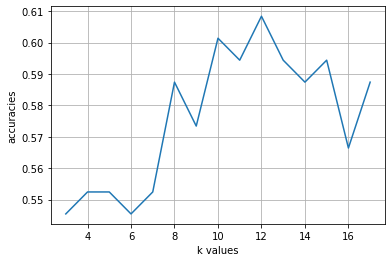

In [28]:
plt.plot(neighbors,metric_k)
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid();

# Building Knn Model with K Value having Maximum Accuracy

In [29]:
classifier=KNeighborsClassifier(n_neighbors=12)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred_kNN)

0.6083916083916084

In [31]:
precision_score(y_test,y_pred_kNN)

0.5

In [32]:
recall_score(y_test,y_pred_kNN)

0.16071428571428573

In [33]:
confusion_matrix(y_test,y_pred_kNN)

array([[78,  9],
       [47,  9]], dtype=int64)

# SVM Model

In [34]:
from sklearn.svm import SVC

In [35]:
clf_svm=SVC(kernel='linear')
clf_svm= clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)

In [36]:
confusion_matrix(y_test,y_pred_svm)

array([[69, 18],
       [20, 36]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred_svm)

0.7342657342657343

In [38]:
clf_svm2=SVC(kernel='rbf')
clf_svm2= clf_svm.fit(X_train,y_train)
y_pred_svm2=clf_svm.predict(X_test)

In [39]:
confusion_matrix(y_test,y_pred_svm2)

array([[69, 18],
       [20, 36]], dtype=int64)

In [40]:
accuracy_score(y_test,y_pred_svm2)

0.7342657342657343

# KFold Splitting

In [41]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [42]:
for train_index, test_index in kf.split(X,y):
    print(train_index,test_index)

[ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 31

In [43]:
def get_score(model, X_train, X_test,y_train, y_test ):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [44]:
get_score(KNeighborsClassifier(n_neighbors=12), X_train, X_test,y_train, y_test )

0.6083916083916084

Accuracy for Knn Model is 60.83%

In [45]:
get_score(SVC(kernel='rbf'), X_train, X_test,y_train, y_test )

0.6083916083916084

Accuracy for SVM model with Kernel rbf is 60.83%

In [46]:
get_score(SVC(kernel='linear'), X_train, X_test,y_train, y_test )

0.7342657342657343

Accuracy for SVM Model with kernal Linear is 73.42%

# KFold Cross Validation

In [47]:
from sklearn.model_selection import KFold

In [48]:
kfold_validator=KFold(10)

In [49]:
for train_index, test_index in kfold_validator.split(X,y):
    print(train_index,test_index)

[ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 31

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=12),X,y,cv=kfold_validator)

In [52]:
score

array([0.59722222, 0.79166667, 0.51388889, 0.5       , 0.53521127,
       0.45070423, 0.53521127, 0.63380282, 0.53521127, 0.61971831])

In [53]:
score.mean()

0.5712636932707356

Mean Value of Accuracy for Knn model is 57.12%

In [54]:
score1 = cross_val_score(SVC(kernel='rbf'),X,y,cv=kfold_validator)
score1

array([0.59722222, 0.77777778, 0.58333333, 0.5       , 0.56338028,
       0.54929577, 0.52112676, 0.63380282, 0.5915493 , 0.61971831])

In [55]:
score1.mean()

0.5937206572769953

In [56]:
score2= cross_val_score(SVC(kernel='linear'),X,y,cv=kfold_validator)
score2

array([0.81944444, 0.80555556, 0.76388889, 0.81944444, 0.76056338,
       0.77464789, 0.71830986, 0.74647887, 0.78873239, 0.8028169 ])

In [57]:
score2.mean()

0.7799882629107981

# Stratified KFold

In [58]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10)


In [59]:
for train_index, test_index in folds.split(X,y):
    print(train_index,test_index)

[ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 31

In [60]:
score1 = cross_val_score(SVC(kernel='rbf'),X,y,cv=folds)
score1

array([0.59722222, 0.59722222, 0.59722222, 0.59722222, 0.5915493 ,
       0.5915493 , 0.5915493 , 0.5915493 , 0.5915493 , 0.5915493 ])

In [61]:
score1.mean()

0.5938184663536776

In [62]:
score2= cross_val_score(SVC(kernel='linear'),X,y,cv=folds)
score2


array([0.81944444, 0.75      , 0.80555556, 0.83333333, 0.73239437,
       0.8028169 , 0.74647887, 0.71830986, 0.8028169 , 0.78873239])

In [63]:
score2.mean()

0.7799882629107981

In [64]:
score3 = cross_val_score(KNeighborsClassifier(n_neighbors=12),X,y,cv=folds)
score3

array([0.59722222, 0.59722222, 0.30555556, 0.31944444, 0.32394366,
       0.4084507 , 0.36619718, 0.5915493 , 0.5915493 , 0.5915493 ])

In [65]:
score3.mean()

0.46926838810641625